# Yolo Segmentation
# MSSV: 21110374
# Trần Anh Quân

## **1.** Tiến hành test segmentation bằng yolo cho 1 danh sách ảnh chuẩn bị sẵn và lưu các kết quả segment : hình ảnh kết quả segment, các box và các mask vào file JSON. Mỗi ảnh 1 JSON file

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
import gdown
import zipfile
import os

file_id = '1xkAJiYikMVLgev6C4MJyhLqpSZcUb50b'
url = f"https://drive.google.com/uc?id={file_id}"

zip_path = 'Image.zip'

# Download the file
gdown.download(url, zip_path, quiet=False)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('Images')

# Remove the ZIP file after extraction
os.remove(zip_path)
if not os.path.exists('Images'):
    download_images()



Downloading...
From: https://drive.google.com/uc?id=1xkAJiYikMVLgev6C4MJyhLqpSZcUb50b
To: /content/Image.zip
100%|██████████| 220k/220k [00:00<00:00, 4.38MB/s]


In [ ]:
!ls {HOME}/images

ls: cannot access '/content/images': No such file or directory


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [ ]:
import json
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt
import numpy as np

model = YOLO('yolov8s-seg.pt')

image_folder = 'Images'
image_files = [f for f in os.listdir(image_folder)]

output_folder = 'results'
os.makedirs(output_folder, exist_ok=True)

def save_results(image_name, boxes, masks, output_folder):
    results = {
        'boxes': {
            'cls': boxes.cls.tolist(),
            'conf': boxes.conf.tolist(),
            'data': boxes.data.tolist(),
            'xyxy': boxes.xyxy.tolist(),
            'xywh': boxes.xywh.tolist(),
            'xyxyn': boxes.xyxyn.tolist(),
            'xywhn': boxes.xywhn.tolist()
        },
        'masks': masks.tolist() if masks is not None else None
    }
    output_path = os.path.join(output_folder, f"{os.path.splitext(image_name)[0]}.json")
    with open(output_path, 'w') as json_file:
        json.dump(results, json_file)

def show_image_with_boxes(image_path, boxes):
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    for box in boxes:
        draw.rectangle([box[0], box[1], box[2], box[3]], outline="red", width=2)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def array_to_pil(image_array):
    return Image.fromarray(np.uint8(image_array))




WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/Images/CatLoad.jpg: 576x640 1 cat, 317.7ms
Speed: 21.5ms preprocess, 317.7ms inference, 1988.4ms postprocess per image at shape (1, 3, 576, 640)


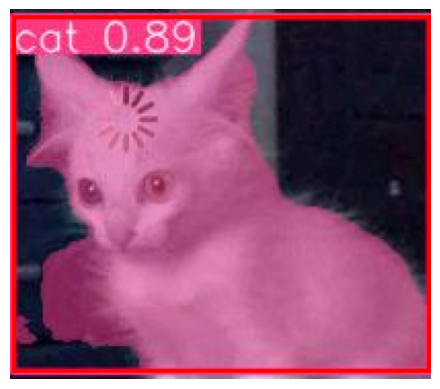


image 1/1 /content/Images/Emotion.jpg: 384x640 1 person, 1 tie, 1 bottle, 358.8ms
Speed: 3.2ms preprocess, 358.8ms inference, 24.1ms postprocess per image at shape (1, 3, 384, 640)


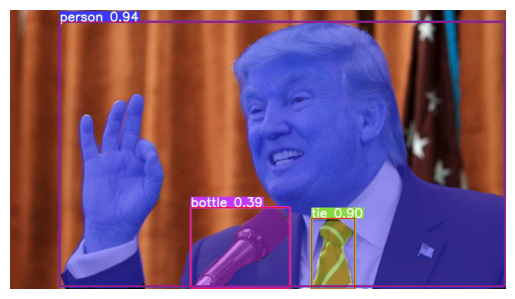


image 1/1 /content/Images/Good.jpg: 640x640 (no detections), 36.6ms
Speed: 4.2ms preprocess, 36.6ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


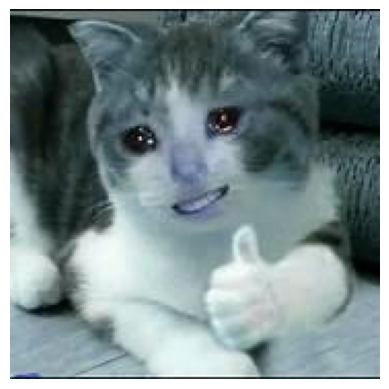


image 1/1 /content/Images/Wolf.jpg: 608x640 2 dogs, 157.8ms
Speed: 9.4ms preprocess, 157.8ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 640)


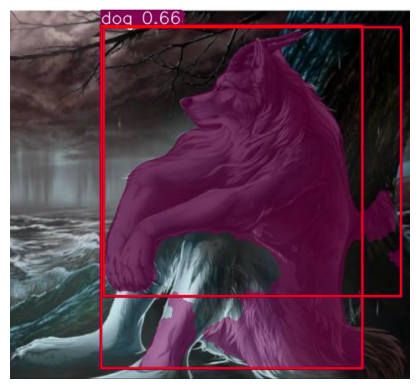


image 1/1 /content/Images/Hmm.jpg: 640x640 1 cat, 22.5ms
Speed: 3.6ms preprocess, 22.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


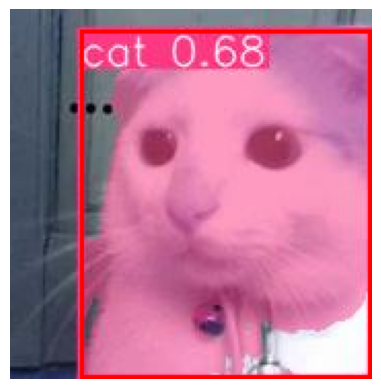


image 1/1 /content/Images/Cheems.jpg: 640x480 1 dog, 114.1ms
Speed: 11.1ms preprocess, 114.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 480)


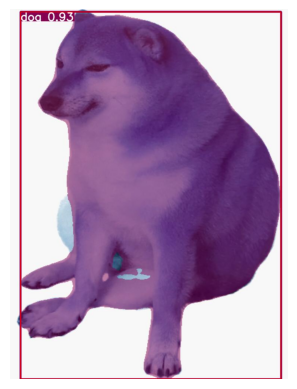

In [ ]:
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)

    results = model.predict(source=image_path, conf=0.25)

    boxes = results[0].boxes
    masks = results[0].masks.data if results[0].masks is not None else None

    result_image_array = results[0].plot()
    result_image = array_to_pil(result_image_array)

    result_image_path = os.path.join(output_folder, f"segmented_{image_file}")
    result_image.save(result_image_path)

    save_results(image_file, boxes, masks, output_folder)

    show_image_with_boxes(result_image_path, boxes.xyxy)

In [ ]:
!ls {HOME}/results

CatLoad.json  Good.json		     segmented_Cheems.jpg   segmented_Hmm.jpg
Cheems.json   Hmm.json		     segmented_Emotion.jpg  segmented_Wolf.jpg
Emotion.json  segmented_CatLoad.jpg  segmented_Good.jpg     Wolf.json


In [ ]:
with open(f'{HOME}/results/Wolf.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

json_string = json.dumps(data, indent=4)
json_lines = json_string.splitlines()

for line in json_lines[:100]:
    print(line)

{
    "boxes": {
        "cls": [
            16.0,
            16.0
        ],
        "conf": [
            0.6600829362869263,
            0.336353600025177
        ],
        "data": [
            [
                108.6480712890625,
                19.88115692138672,
                420.11956787109375,
                428.4692687988281,
                0.6600829362869263,
                16.0
            ],
            [
                111.94808959960938,
                21.035289764404297,
                466.8879699707031,
                342.7969970703125,
                0.336353600025177,
                16.0
            ]
        ],
        "xyxy": [
            [
                108.6480712890625,
                19.88115692138672,
                420.11956787109375,
                428.4692687988281
            ],
            [
                111.94808959960938,
                21.035289764404297,
                466.8879699707031,
                342.7969970703125
     

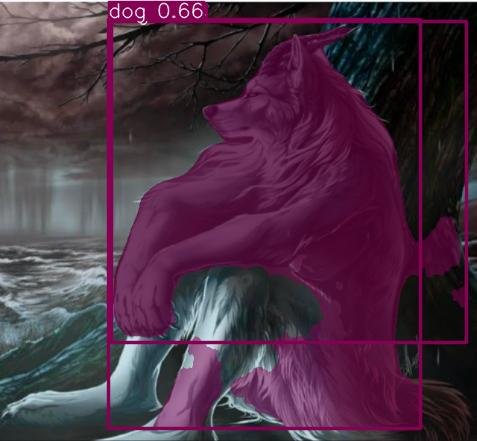

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/results/segmented_Wolf.jpg', width=600)